# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor

# Problem Statement

In this data, we have one independent variable 'Temperature' and one dependent variable 'Revenue'. You have to build a DecisionTreeRegressor to study the relationship b/w the two variables  of the Ice Cream Shop and then predict the revenue for the ice cream shop based on the temperature on a particular day.

# Import the dataset

Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature V/s Revenue')

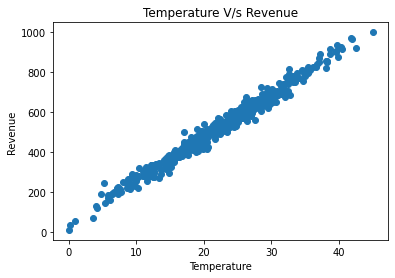

In [8]:
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature V/s Revenue')

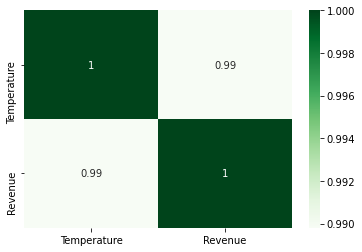

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

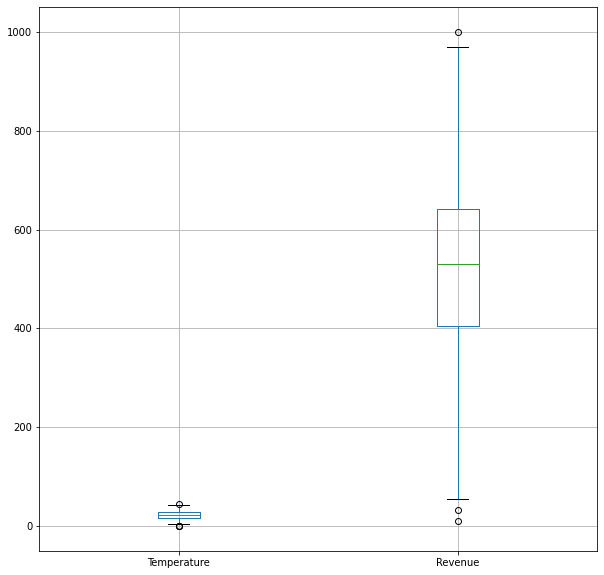

In [14]:
plt.figure(figsize=(10,10))
df.boxplot()

# Spliting of data - Training & Testing set

In [15]:
X = np.array(df.Temperature.values)
y = np.array(df.Revenue.values)

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [23]:
len(X_test)

100

# Choosing the model

In [24]:
regressor = DecisionTreeRegressor()

# Training the model

In [26]:
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# Testing the model

In [27]:
y_pred = regressor.predict(X_test.reshape(-1,1))

# Comparing the y_test with y_pred

In [28]:
comp = pd.DataFrame({"Actual Values":y_test.reshape(-1),
                     "Predicted Values":y_pred.reshape(-1)})

In [29]:
comp

,Actual Values,Predicted Values
0,436.951311,430.343903
1,450.708589,454.189267
2,545.903929,537.664801
3,284.772789,321.848273
4,451.450784,417.354839
...,...,...
95,704.281439,690.789296
96,444.826802,476.794525
97,684.158444,746.946389
98,335.156856,319.402903


Text(0, 0.5, 'y_test/y_pred')

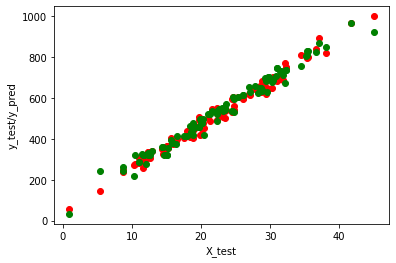

In [31]:
plt.scatter(X_test,y_test, color = 'red')
plt.scatter(X_test,y_pred, color = 'green')
plt.xlabel('X_test')
plt.ylabel('y_test/y_pred')

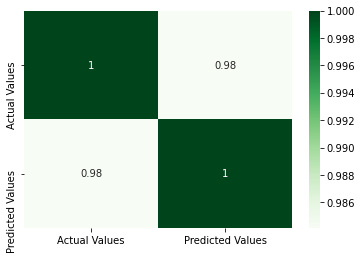

In [33]:
sns.heatmap(comp.corr(), annot=True, cmap='Greens')

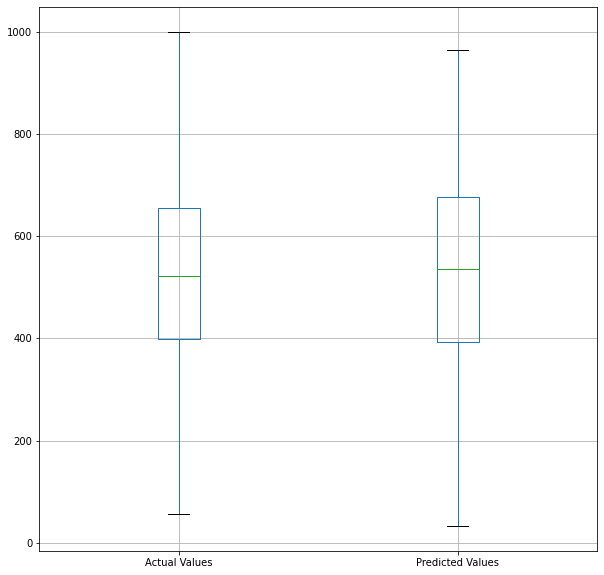

In [34]:
plt.figure(figsize=(10,10))
comp.boxplot()

# Performance

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [36]:
r2_score(y_test,y_pred)

0.9674361744547726

In [37]:
mean_squared_error(y_test,y_pred)

1078.7269446505143

In [38]:
mean_absolute_error(y_test,y_pred)

25.181967644200004